# Coursework: Neural Network Training

***Course: Statistics and Machine Learning 2 (DATA70132)***
<br>***Professor: Dr. Angelo Cangelosi***
<br>***Date: Apr 2023***

__Convolutional Neural Network (CNN)__ Training on Image Dataset __CIFAR-10__. The CIFAR-10 is a benchmark machine learning dataset consisting of 60000 32x32 colour (using 3 RGB colour channels) images in 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck) with 6000 images per class. There are 50000 training images and 10000 test images. This dataset is enclosed in the default Anaconda KERAS package.

__Initialisation of the program__

The program starts with the importing of typical Keras and other Python service modules.

In [8]:
# importing of modules for CIFAR-10 CNN 
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop

# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


The following constant and variable definitions are needed for the network and training parameters.


In [9]:
# seed for reproducibility
np.random.seed(1441) 

#training constants
BATCH_SIZE = 128
N_EPOCH = 20 # use 20 for best initial results
N_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIMIZER = Adam()

print('Main variables initialised.')

Main variables initialised.


Constant definition for the training set images.

In [10]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

INPUT_SHAPE = (IMG_ROWS, IMG_COLS, IMG_CHANNELS)

print('Image variables initialisation')

Image variables initialisation


__CIFAR-10 data loading__

Loading of the CIFAR-10 training set.

In [11]:
# load dataset
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()
print('input_X_train shape:', input_X_train.shape)
# print('input_X_test shape:', input_X_test.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')

input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


**Visualisation of two sample CIFAR-10 images**

Here we will visualise two sample images from the dataset.

In order to reference the class names of the images during the visualization stage, a python list containing the classes is initialized with the variable name CLASS_NAMES. Additionally, to visualize few images from teh dataset, a dataset is created using the training data. 

In [12]:
# Classes in CIFAR-10
CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# tf.data.Dataset.from_tensor_slices method takes the train dataset and
# returns a corresponding TensorFlow Dataset representation.

train_ds=tf.data.Dataset.from_tensor_slices((input_X_train, output_y_train))

The CIFAR-10 images have small dimensions, which makes visualization of the actual pictures a bit difficult.

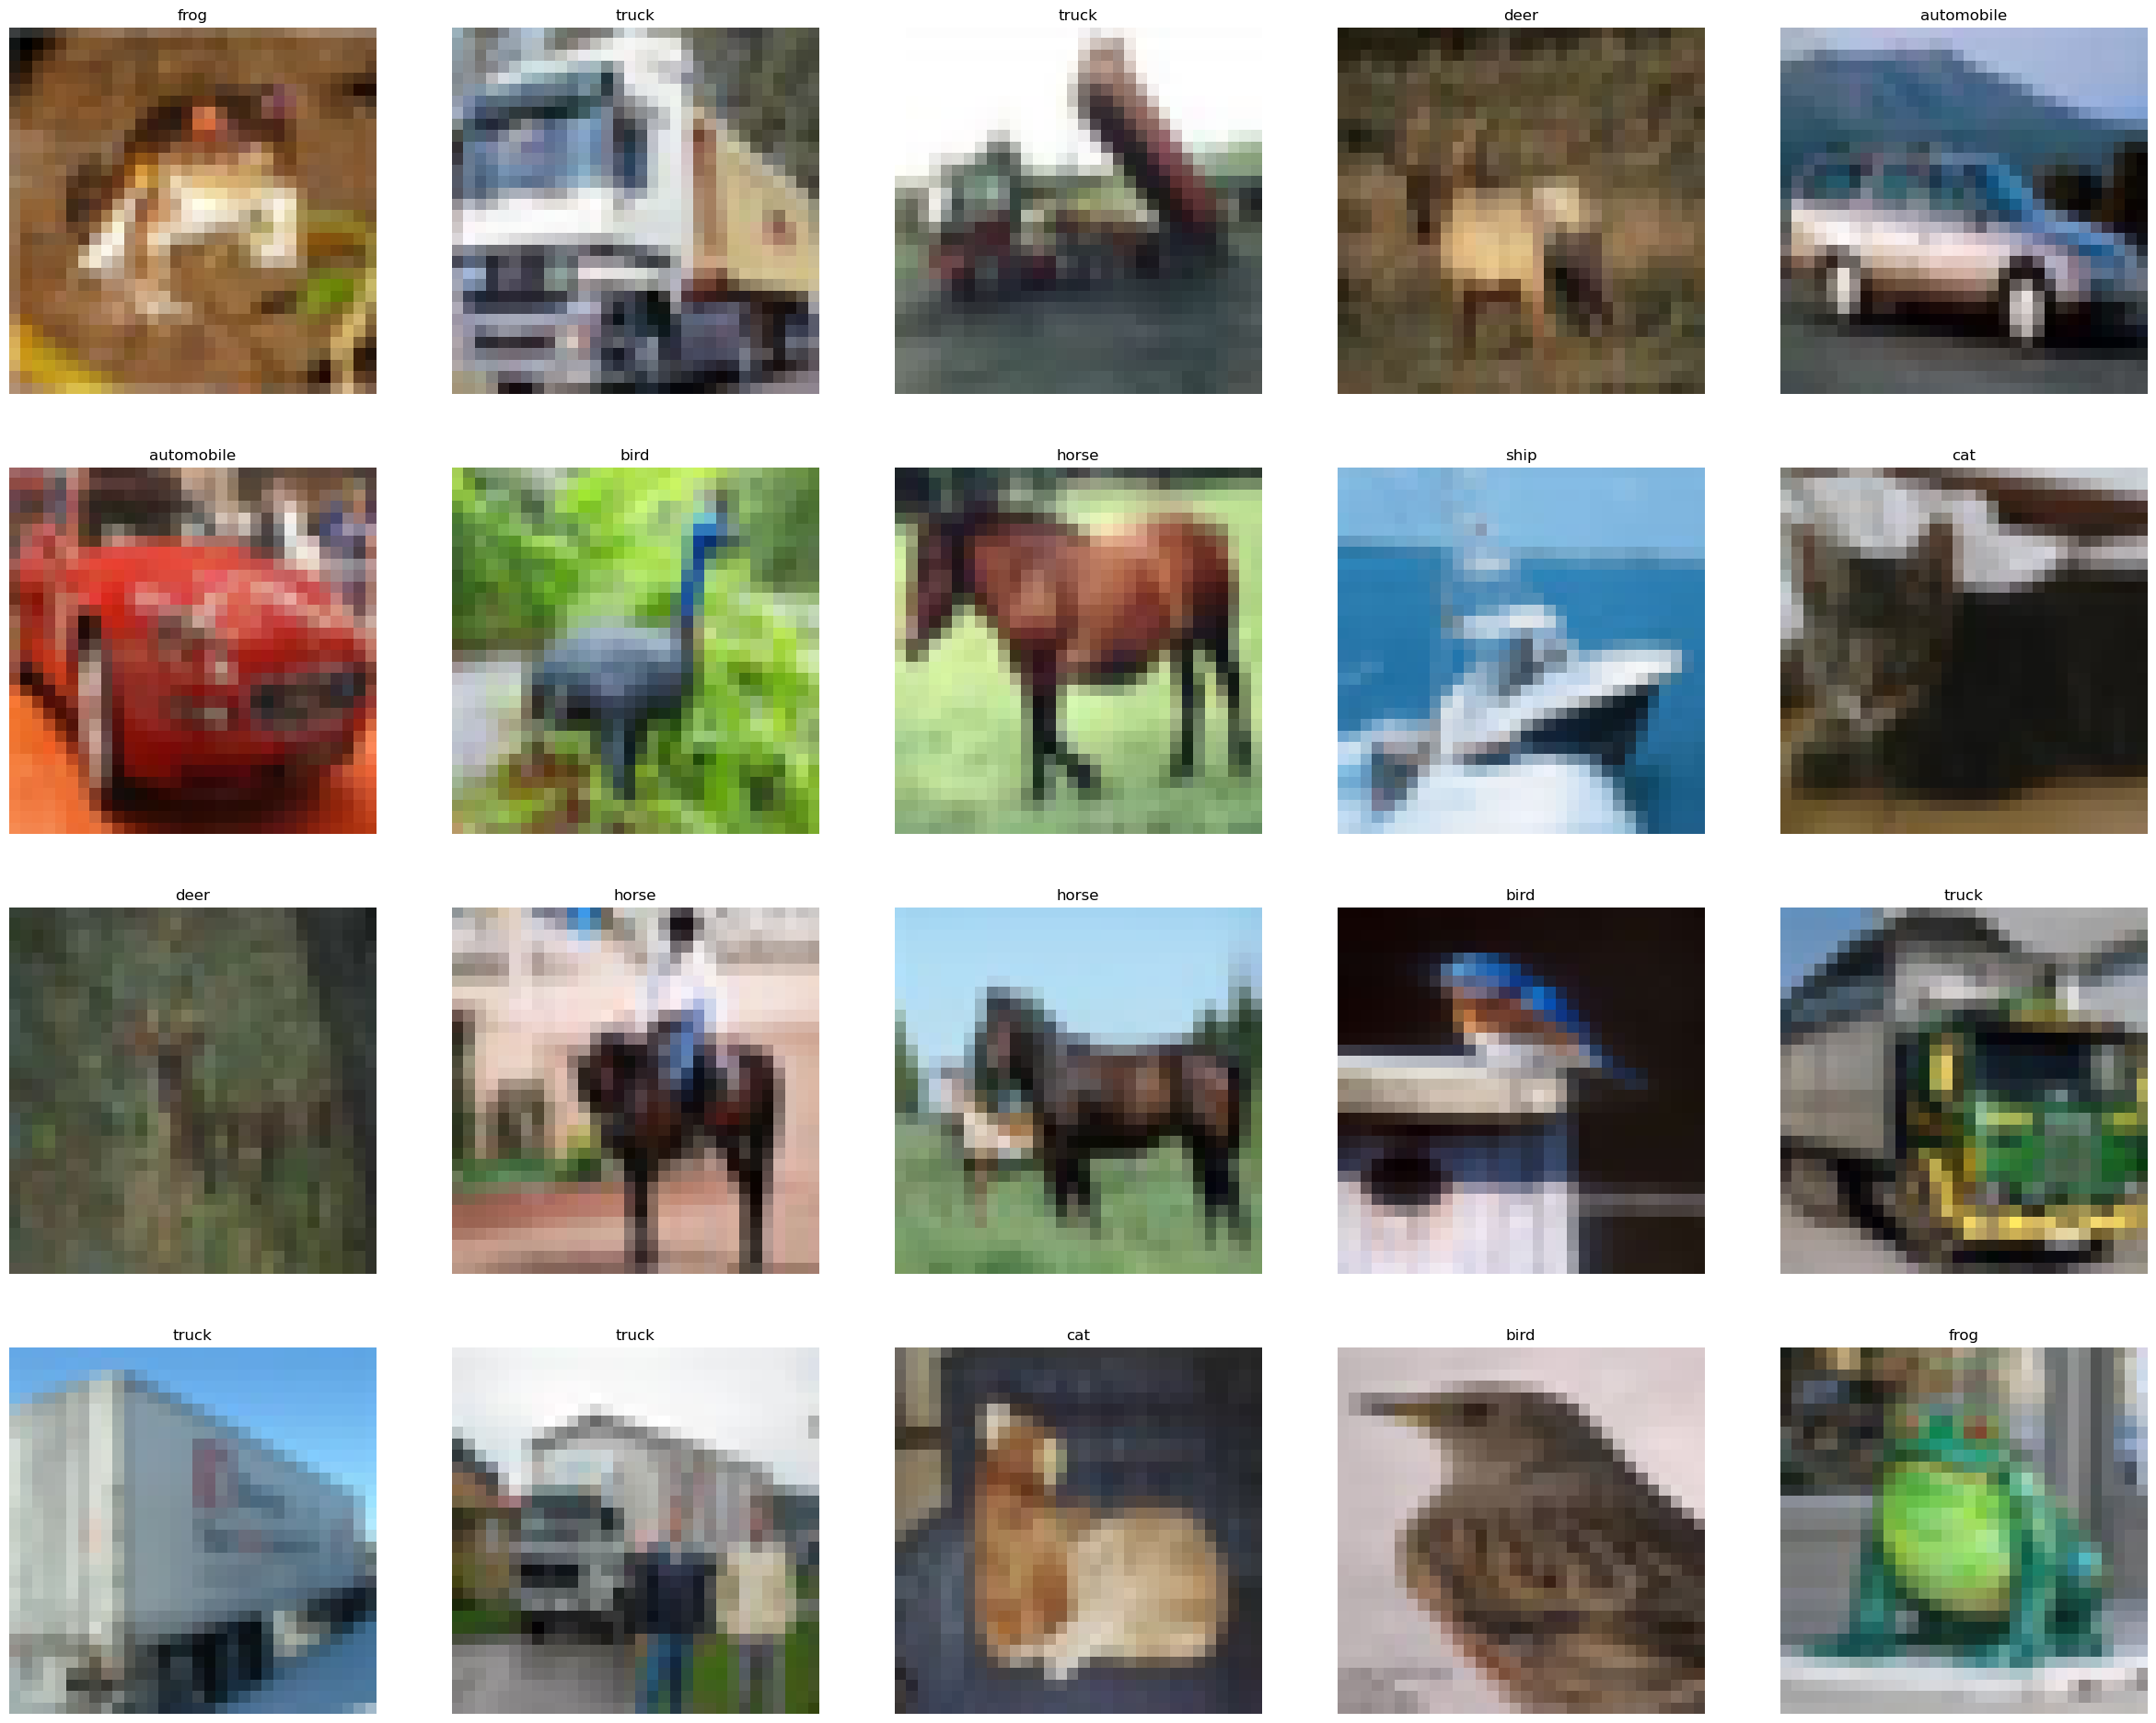

In [6]:
plt.figure(figsize=(30,30))
for i,(image,label) in enumerate(train_ds.take(20)):
    ax=plt.subplot(5,5,i+1)
    plt.imshow(image)
    plt.title(CLASS_NAMES[label.numpy()[0]])
    plt.axis('off')

__CIFAR-10 data preprocessing__

Pre-processing the CIFAR-10 dataset to achieve zero-centered data (or, zero-mean data).

In [13]:
# float and zero-mean data
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')

train_image_mean = np.mean(input_X_train, axis = 0)

input_X_train -= train_image_mean
input_X_test -= train_image_mean

# convert to categorical
output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES) 

# print("Output:", output_Y_train[-5:])

__CNN Model Definition__

This code modifies the LeNet topology and creates a new CNN.

It has a first convolutional module followed by a pooling layer. This convolutional layer (with ReLu activation function) has 20 filters, each with a kernel size of 5x5. The output dimension is not the same as the input image of 28x28 units (because no padding is used). The pooling layers uses a region of 2x2, with max pooling values.

Another convolution layer of 50 filters is then pooled.

This layer is then flattened into a one-dimensional layer, followed by a dense layer of 500 units.

Finally, a softmax dense layer in output classifies the images into the 10 number categories (or, 10 units/classes) as output, i.e. one for each of the 10 classes of objects encoded with one-hot coding.



In [8]:
#define the ConvNet 
class ConvNet:
	@staticmethod
	def build(input_shape, classes):
		model = Sequential()
        
		# CONV => RELU => POOL
		model.add(Conv2D(20, kernel_size=5, padding="valid", input_shape=input_shape))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
        
		# CONV => RELU => POOL
		model.add(Conv2D(50, kernel_size=5, padding="valid"))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
        
		# Flatten => RELU layers
		model.add(Flatten())
		model.add(Dense(500))
		model.add(Activation("relu"))
 
		# a softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		return model

print('ConvNet class defined.')

ConvNet class defined.


**Model initialisation and compilation**

This initialises the model using the ConvNet function, and then compiles the network and shows its summary. 

In [9]:
# initialize the optimizer and compile the model
model = ConvNet.build(input_shape=INPUT_SHAPE, classes=N_CLASSES)

model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER, metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 20)        1520      
                                                                 
 activation (Activation)     (None, 28, 28, 20)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 50)        25050     
                                                                 
 activation_1 (Activation)   (None, 10, 10, 50)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 50)         0         
 2D)                                                    

**Training of the CNN**

This line of code trains the model, saving the metrics data in the history variable.

In [15]:
# training/fitting of the ConvNet model

# let's reduce the number of epoch to 3, for a faster test of the checkpoint utility. Then revert to N_EPOCH = 20
#N_EPOCH = 3

history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


Epoch 1/20
313/313 [==============================] - 12s 37ms/step - loss: 0.3131 - accuracy: 0.8910 - val_loss: 2.6272 - val_accuracy: 0.5567
Epoch 2/20
313/313 [==============================] - 11s 34ms/step - loss: 0.3230 - accuracy: 0.8915 - val_loss: 2.9163 - val_accuracy: 0.5312
Epoch 3/20
313/313 [==============================] - 11s 35ms/step - loss: 0.3122 - accuracy: 0.8941 - val_loss: 2.9801 - val_accuracy: 0.5464
Epoch 4/20
313/313 [==============================] - 11s 36ms/step - loss: 0.2907 - accuracy: 0.9018 - val_loss: 2.9687 - val_accuracy: 0.5469
Epoch 5/20
313/313 [==============================] - 11s 37ms/step - loss: 0.2708 - accuracy: 0.9090 - val_loss: 3.1571 - val_accuracy: 0.5453
Epoch 6/20
313/313 [==============================] - 12s 37ms/step - loss: 0.2575 - accuracy: 0.9152 - val_loss: 3.2794 - val_accuracy: 0.5387
Epoch 7/20
313/313 [==============================] - 11s 37ms/step - loss: 0.2685 - accuracy: 0.9129 - val_loss: 3.3504 - val_accuracy:

**Saving of the model and of the trained weights**

This saves the model definition and the weights, after training.

In [13]:
#save model in json format into a file
model_json = model.to_json()
open('cifar10_architecture_v2.json', 'w').write(model_json)

#save the trained weights
model.save_weights('cifar10_weights_v2.h5', overwrite=True)

print('Files saved for model definition and for weights.')

Files saved for model definition and for weights.


**Analysis of the results**

This code generates the test scores, so we can visualise and inspect the model's peformance.

It also plots the accuracy and loss values along the training timescale.

79/79 [==============================] - 1s 12ms/step - loss: 4.9760 - accuracy: 0.5484

Test score/loss: 4.976006031036377
Test accuracy: 0.5483999848365784
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


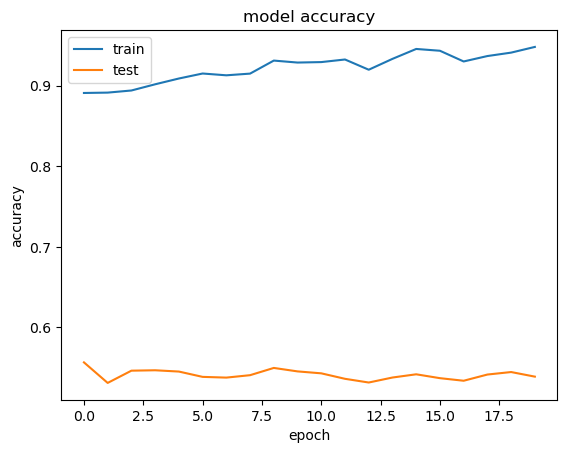

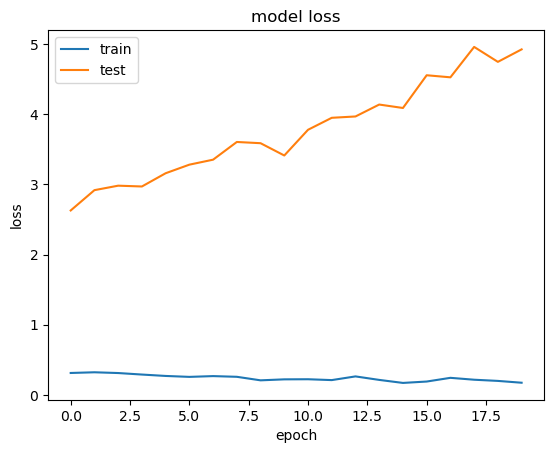

In [16]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



__Case II: Tweaking Learning Hyperparameter: Learning Rate__

Redefining OPTIMIZER by changing the learning rate

In [21]:
OPTIMIZER = Adam(learning_rate=0.001)

**Model initialisation and compilation**

This initialises the model using the ConvNet function with redefined __Learning Rate__, and then compiles the network and shows its summary. 

In [35]:
# initialize the optimizer and compile the model
model = ConvNet.build(input_shape=INPUT_SHAPE, classes=N_CLASSES)

model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER, metrics=["accuracy"])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 20)        1520      
                                                                 
 activation_12 (Activation)  (None, 28, 28, 20)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 20)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 50)        25050     
                                                                 
 activation_13 (Activation)  (None, 10, 10, 50)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 50)         0         
 2D)                                                  

**Training of the CNN**

This line of code trains the model, saving the metrics data in the history variable.

In [29]:
# training/fitting of the ConvNet model

# let's reduce the number of epoch to 10, for a faster test of the checkpoint utility. Then revert to N_EPOCH = 20
#N_EPOCH = 10
#BATCH_SIZE = 64

history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


Epoch 1/20
313/313 [==============================] - 11s 36ms/step - loss: 2.3034 - accuracy: 0.0993 - val_loss: 2.3032 - val_accuracy: 0.0980
Epoch 2/20
313/313 [==============================] - 11s 36ms/step - loss: 2.3034 - accuracy: 0.0975 - val_loss: 2.3029 - val_accuracy: 0.1014
Epoch 3/20
313/313 [==============================] - 12s 38ms/step - loss: 2.3032 - accuracy: 0.1007 - val_loss: 2.3032 - val_accuracy: 0.1003
Epoch 4/20
313/313 [==============================] - 12s 38ms/step - loss: 2.3033 - accuracy: 0.0985 - val_loss: 2.3032 - val_accuracy: 0.1014
Epoch 5/20
313/313 [==============================] - 12s 37ms/step - loss: 2.3031 - accuracy: 0.1024 - val_loss: 2.3031 - val_accuracy: 0.1025
Epoch 6/20
313/313 [==============================] - 12s 38ms/step - loss: 2.3032 - accuracy: 0.0998 - val_loss: 2.3034 - val_accuracy: 0.1022
Epoch 7/20
313/313 [==============================] - 12s 38ms/step - loss: 2.3033 - accuracy: 0.1009 - val_loss: 2.3032 - val_accuracy:

**Analysis of the results**

This code generates the test scores, so we can visualise and inspect the model's peformance.

It also plots the accuracy and loss values along the training timescale.

79/79 [==============================] - 1s 12ms/step - loss: 2.3031 - accuracy: 0.1000

Test score/loss: 2.3030853271484375
Test accuracy: 0.10000000149011612
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


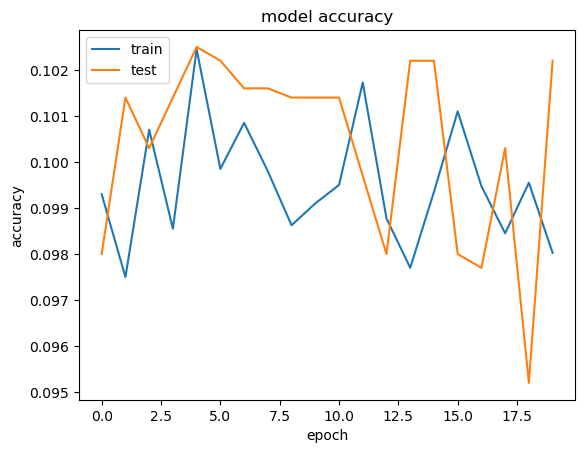

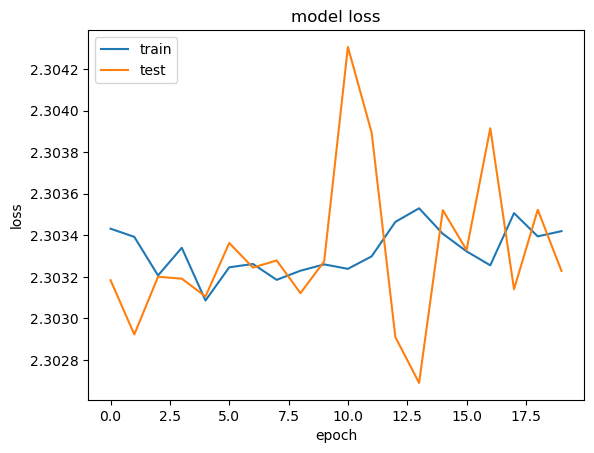

In [30]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [1]:
# Reducing Learning Rate further

OPTIMIZER = Adam(learning_rate=1e-6)



NameError: name 'Adam' is not defined

In [22]:
#define the ConvNet 
class Modified_ConvNet:
	@staticmethod
	def build(input_shape, classes):
		model = Sequential()
        
		# CONV => RELU => POOL
		model.add(Conv2D(20, kernel_size=5, padding="valid", input_shape=input_shape))
		model.add(Activation("relu"))
#		model.add(BatchNormalization())
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
        
		# CONV => RELU => POOL
		model.add(Conv2D(50, kernel_size=5, padding="valid"))
#		model.add(BatchNormalization())
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
        
		# Flatten => RELU layers
		model.add(Flatten())
		model.add(Dense(500))
#		model.add(BatchNormalization())
		model.add(Activation("relu"))
 
		# a softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		return model

print('Modified_ConvNet class defined.')

Modified_ConvNet class defined.


In [18]:
# initialize the optimizer and compile the model
model = Modified_ConvNet.build(input_shape=INPUT_SHAPE, classes=N_CLASSES)

model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER, metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 20)        1520      
                                                                 
 activation (Activation)     (None, 28, 28, 20)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 50)        25050     
                                                                 
 activation_1 (Activation)   (None, 23, 23, 50)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 50)       0         
 2D)                                                    

__Case III: Changing Training Algorithm Hyperparameter: Number of Epochs__

Training of the CNN
This line of code trains the model, saving the metrics data in the history variable.

In [25]:
# training/fitting of the ConvNet model

# let's increase the number of epoch to 50
N_EPOCH = 20
BATCH_SIZE = 128

history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


Epoch 1/20
313/313 [==============================] - 63s 196ms/step - loss: 0.4917 - accuracy: 0.8231 - val_loss: 4.4618 - val_accuracy: 0.3467
Epoch 2/20
313/313 [==============================] - 62s 198ms/step - loss: 0.4879 - accuracy: 0.8262 - val_loss: 4.7935 - val_accuracy: 0.3491
Epoch 3/20
313/313 [==============================] - 67s 215ms/step - loss: 0.4832 - accuracy: 0.8291 - val_loss: 4.8978 - val_accuracy: 0.3445
Epoch 4/20
313/313 [==============================] - 65s 207ms/step - loss: 0.4664 - accuracy: 0.8356 - val_loss: 5.4044 - val_accuracy: 0.3538
Epoch 5/20
313/313 [==============================] - 66s 210ms/step - loss: 0.4816 - accuracy: 0.8314 - val_loss: 5.4754 - val_accuracy: 0.3411
Epoch 6/20
313/313 [==============================] - 70s 223ms/step - loss: 0.4409 - accuracy: 0.8430 - val_loss: 5.8156 - val_accuracy: 0.3456
Epoch 7/20
313/313 [==============================] - 79s 252ms/step - loss: 0.4453 - accuracy: 0.8424 - val_loss: 5.8666 - val_ac

__Analysis of the results__

This code generates the test scores, so we can visualise and inspect the model's peformance.
It also plots the accuracy and loss values along the training timescale.

79/79 [==============================] - 4s 52ms/step - loss: 8.6590 - accuracy: 0.3505

Test score/loss: 8.658963203430176
Test accuracy: 0.3504999876022339
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


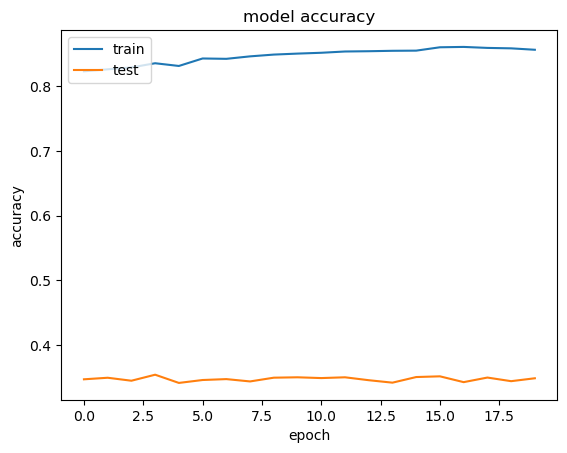

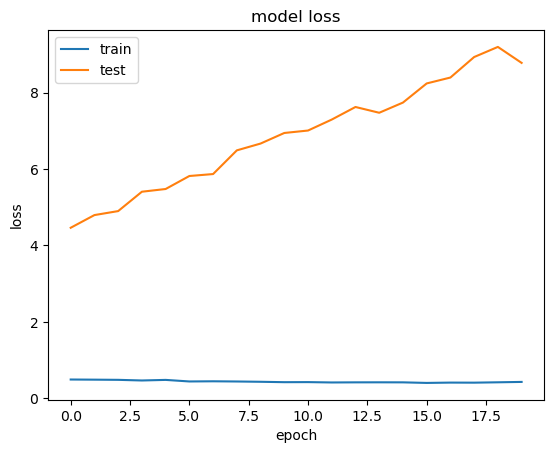

In [26]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

